In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from matplotlib.lines import Line2D
import os

/home/x1b3d3ad/.local/lib/python3.11/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


# Analysis 0 (James)
# The goal of this analysis is to determine if being a left handed or switch batter makes it more likly for you to get onto an allstar team.

In [2]:
#Load in needed datasets
cwd = os.getcwd()
allstar = pd.read_csv(os.path.join(cwd, 'baseball/core/AllstarFull.csv'))
batting = pd.read_csv(os.path.join(cwd, 'baseball/core/People.csv'))

In [3]:
# Split batting up into left, right and switch and remove unneeded data from the csv files
batting = batting[['playerID', 'bats']]
left = batting[batting.bats == 'L']
right = batting[batting.bats == 'R']
both = batting[batting.bats == 'B']
allstar = allstar[['playerID']]

In [4]:
# getting % of left handded hitters vs right handed hitters vs switch hitters
all = len(left) + len(right) + len(both)

leftPercent = len(left)/(all)
rightPercent = len(right)/(all)
bothPercent = len(both)/(all)
# print("Players who hit left handed " + str(leftPercent) + "%")
# print("Players who hit right handed " + str(rightPercent) + "%")
# print("Players who hit with bowheads " + str(bothPercent) + "%")

In [5]:
# gets left, right and switch hitters that are on a allstar team
lefts = 0
rights = 0
switch = 0

for id in allstar['playerID']:
    lefttest = left[left.playerID == id]
    righttest = right[right.playerID == id]
    switches = both[both.playerID == id]
    
    if not lefttest.empty:
        lefts += 1
        
    if not righttest.empty:
        rights += 1
        
    if not switches.empty:
        switch += 1
    
# print(lefts)
# print(rights)
# print(switch)

In [6]:
# get percentages on the all star team
leftPercentAS = lefts/(lefts+rights+switch)
rightPercentAS = rights/(lefts+rights+switch)
switchPercentAS = switch/(lefts+rights+switch)

# print("Players who hit left handed " + str(leftPercentAS) + "%")
# print("Players who hit right handed " + str(rightPercentAS) + "%")
# print("Players who hit switch handed " + str(switchPercentAS) + "%")

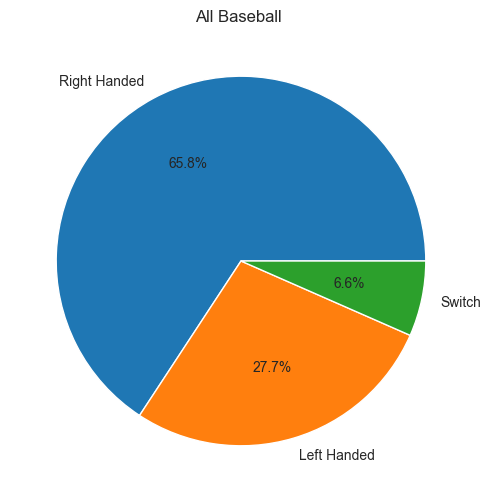

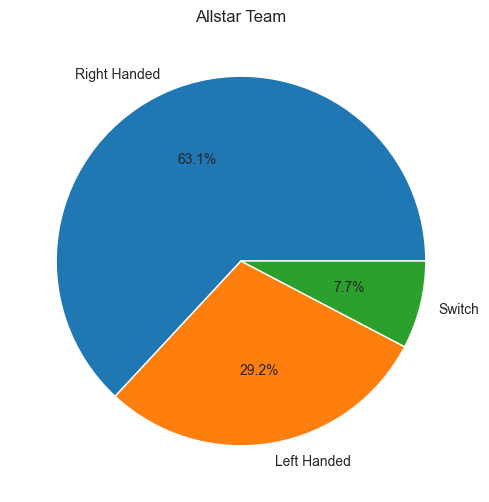

In [7]:
# GRAPHS
data = {'labels': ['Right Handed', 'Left Handed', 'Switch'],
        'values': [rightPercent, leftPercent, bothPercent]}
df = pd.DataFrame(data)

sns.set_style("whitegrid")
plt.figure(figsize=(6,6))
plt.pie(df['values'], labels=df['labels'], autopct='%1.1f%%')
plt.title('All Baseball ')
plt.show()

data = {'labels': ['Right Handed', 'Left Handed', "Switch"],
        'values': [rightPercentAS, leftPercentAS, switchPercentAS]}
df = pd.DataFrame(data)

sns.set_style("whitegrid")
plt.figure(figsize=(6,6))
plt.pie(df['values'], labels=df['labels'], autopct='%1.1f%%')
plt.title('Allstar Team')
plt.show()

### Looking at the data it seems that players are more likley to get onto an allstar team if they hit left handed or switch
### END

### Analysis 2 (James)
# Do hall of fame players make more money?

In [8]:
#loading datasets and removing bloatware (bloatdata?)

hall_Fame = pd.read_csv('baseball/core/HallOfFame.csv')
salaries = pd.read_csv('baseball/core/Salaries.csv')
salaries = salaries[['yearID', 'playerID', 'salary']]
hall_Fame = hall_Fame[['playerID']]

# gets the salaries and years of each player in the hall of fame and puts it into its own data frame
hf_years = []
hf_salaries = []

for hf_player in hall_Fame.playerID:
    if not salaries[salaries['playerID'] == hf_player].empty:
        # these lines get the salaries and years of all the hall of fame players
        for year in salaries[salaries['playerID'] == hf_player].yearID:
            hf_years.append(year)
        for sal in salaries[salaries['playerID'] == hf_player].salary:
            hf_salaries.append(sal)
        # this line removes hall of fame players from the salaries pool
        salaries = salaries.drop(salaries[salaries.playerID == hf_player].index)
            
# these lines make the years and salaries of hall of fame players into a csv
hf_dict = {'yearID': hf_years, 'salaries': hf_salaries}
hf_year_sal = pd.DataFrame(hf_dict)

In [9]:
# take average salaries of both and graph them for each year on a line graph
startYear = 1985
endYear = 2012

x = startYear
hallFamePlayers = []
normalPlayers = []
y = 0
while y < 1985:
    hallFamePlayers.append(0)
    normalPlayers.append(0)
    y+=1

while x <= endYear:
    i = 0
    j = 0
    for item in salaries[salaries['yearID'] == x].salary:
        i+=1
        j+=item
    normalPlayers.append(j / i)
    x+=1
    
x = startYear

while x <= endYear:
    i = 0
    j = 0
    for item in hf_year_sal[hf_year_sal['yearID'] == x].salaries:
        i+=1
        j+=item
        
    hallFamePlayers.append(j / i)
    x+=1

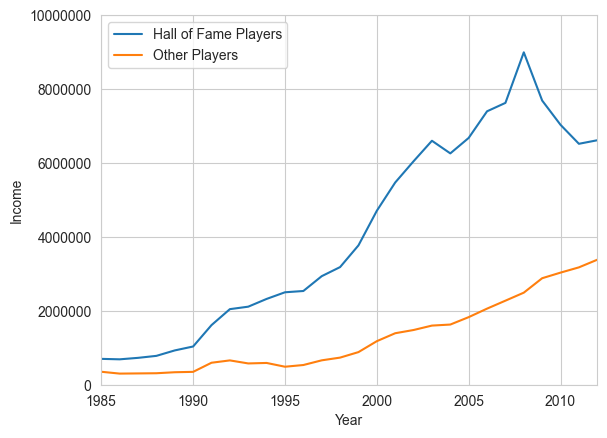

In [10]:
# GRAPH

plt.plot(hallFamePlayers)
plt.plot(normalPlayers)
plt.xlim(1985, 2012)
plt.ylim(0, 10000000)
plt.ticklabel_format(scilimits=(-5, 8))
plt.ylabel('Income')
plt.xlabel('Year')

plt.legend(["Hall of Fame Players", "Other Players"])
plt.show()

### Looking at the data it is clear that on average baseball players who make it into the hall of fame get paid more than those who don't.

# Analysis: which team makes the most money?
## Will a better team make more money?
## Win/Loss ratio vs. Attendance

# -------------------------------------------
# Analysis 3 (Karl)
## Do Better performing teams have more fans?

In [11]:
df = pd.read_csv('baseball/core/Teams.csv')
# print(df.columns)

# calculate win ratio, group by teamID, and sort by attendance
df = df[['yearID', 'teamID', 'attendance', 'W', 'L']]
df['win_ratio'] = df['W'] / (df['W'] + df['L'])
df.drop(['W', 'L'], axis=1, inplace=True)
df.groupby('teamID').mean()
df.sort_values(by='attendance', ascending=False, inplace=True)

# drop rows with NaN
df.dropna(inplace=True)
# print(df.head(20))

# Standardize attendance by z-score
df['attendance'] = (df['attendance'] - df['attendance'].mean()) / df['attendance'].std()


In [12]:
# Do the two variables correlate?
correlation = df['attendance'].corr(df['win_ratio'])
print("correlation: " + str(correlation))

correlation: 0.24449242296703486


Correlation between attendance and win ratio: 0.2444924229670346 <br>
The low positive correlation suggests that there is a weak relationship between the two variables. <br>
The correlation is calculated using df.corr(), which uses Pearson correlation coefficient.

In [13]:
# Print the regression summary (p-value, t-statistic, etc.)
X = df['attendance']
y = df['win_ratio']
model = sm.OLS(y, X).fit()
print(model.summary())
print('\nThe p-value is 0.040, which is less than 0.05, so we can reject the null hypothesis.')
print('This means that there is a statistically significant relationship between the two variables.')

                                 OLS Regression Results                                
Dep. Variable:              win_ratio   R-squared (uncentered):                   0.002
Model:                            OLS   Adj. R-squared (uncentered):              0.001
Method:                 Least Squares   F-statistic:                              4.223
Date:                Sun, 21 Jan 2024   Prob (F-statistic):                      0.0400
Time:                        22:22:42   Log-Likelihood:                         -1910.4
No. Observations:                2586   AIC:                                      3823.
Df Residuals:                    2585   BIC:                                      3829.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

Text(0.5, 1.0, 'Attendance vs. Win Ratio')

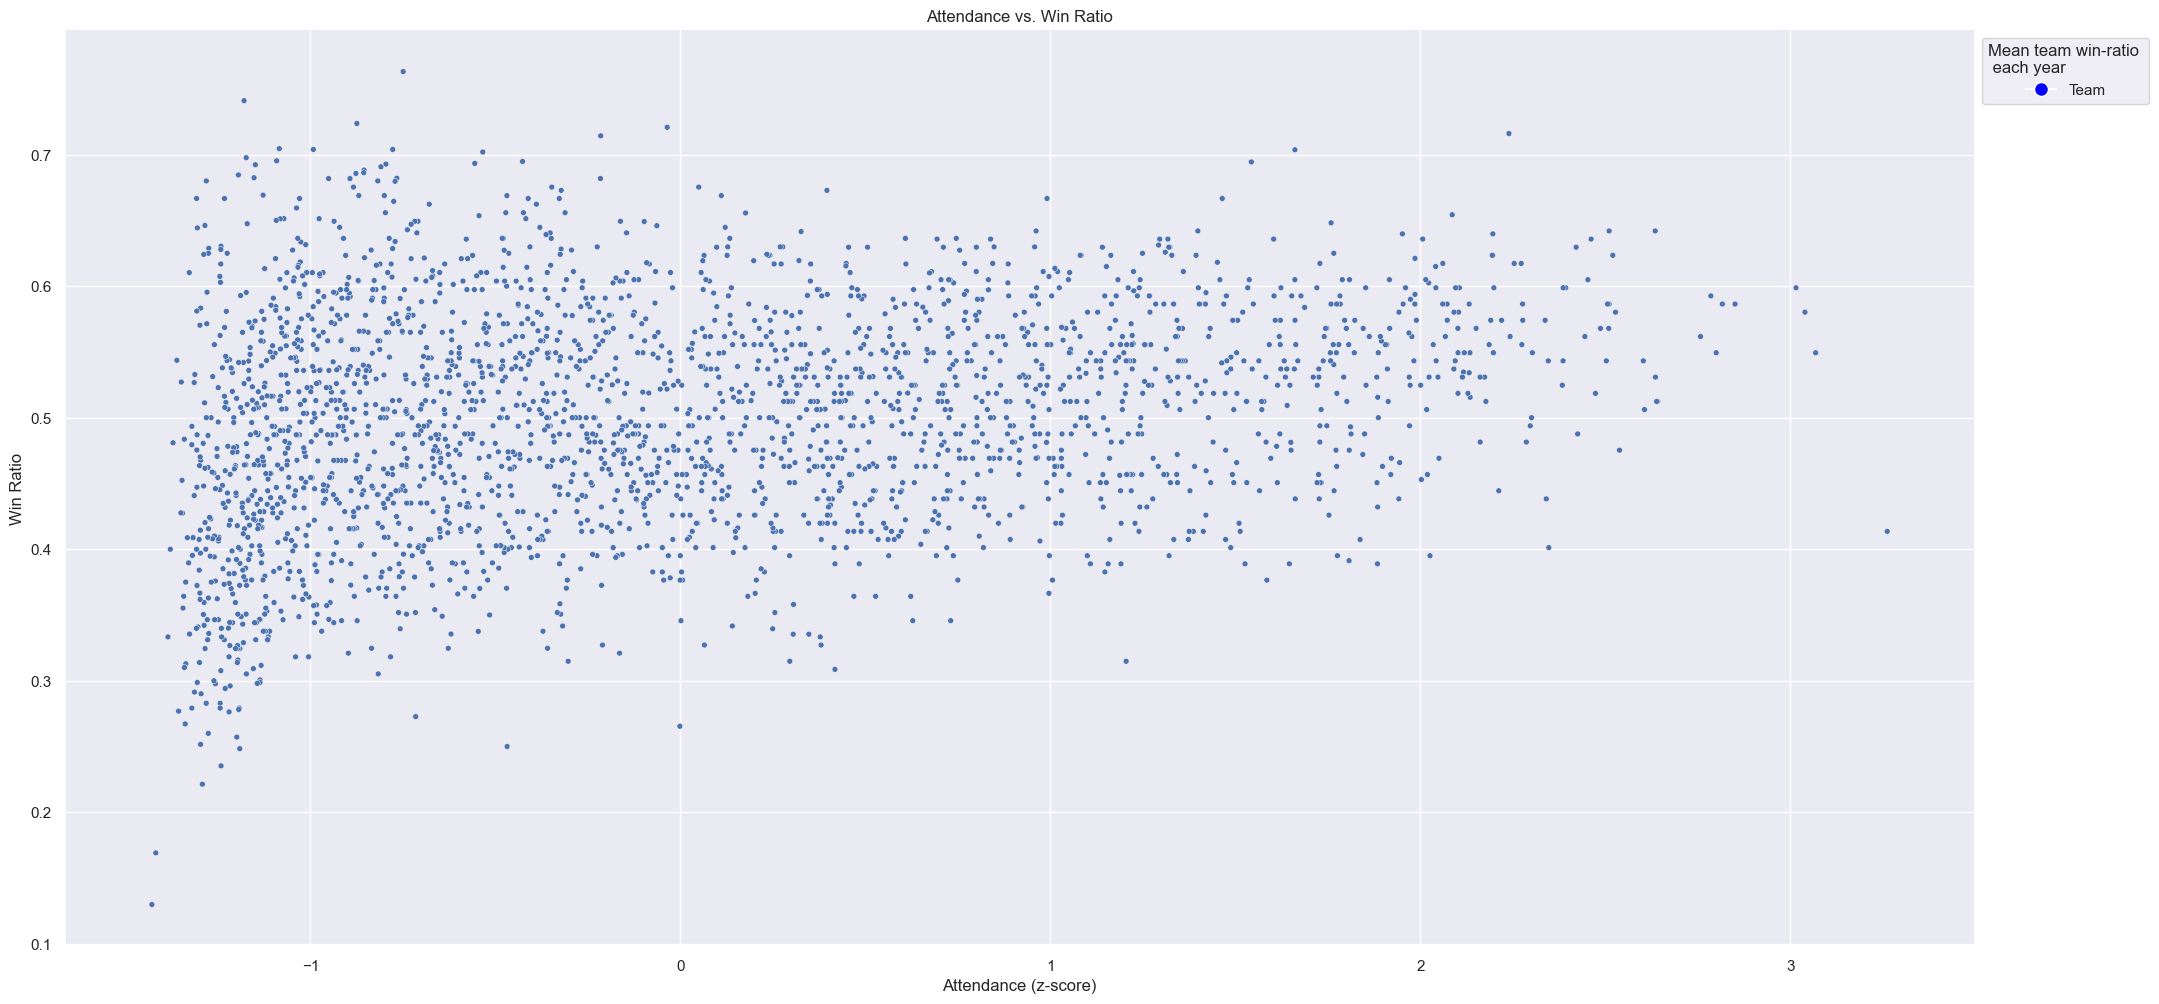

In [14]:
# plot
sns.set(style='darkgrid')
sns.relplot(
            x='attendance', 
            y='win_ratio', 
            size=1, 
            height=10,
            aspect=2,
            legend=False,
            data=df
            )

legend_elements = [Line2D([0], [0], marker='o', color='w', label='Team', markerfacecolor='blue', markersize=10),
]

plt.xlabel('Attendance (z-score)')
plt.ylabel('Win Ratio')
plt.legend(handles=legend_elements, title='Mean team win-ratio \n each year', loc='upper left', bbox_to_anchor=(1, 1), ncol=5)
plt.title('Attendance vs. Win Ratio')




### Conclusion: There is a weak positive correlation between attendance and win ratio.
### END

# -----------------------------------------
## Analysis 4 (Karl)
## Which team variables influence their wing/loss ratio?

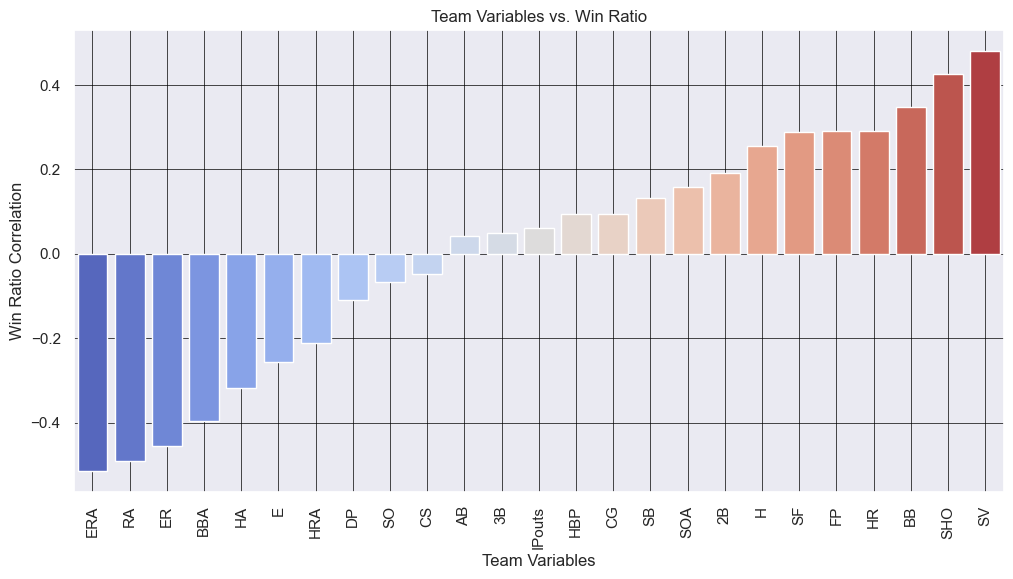


    Strong Positive Correlations:
        Runs (0.4519): As expected, the number of runs scored has a positive correlation with the win ratio. 
        Saves (0.4798): Successful relief pitching and closing out games contribute to victories.
        Shutouts (0.4267): This indicates the importance of strong pitching performances in preventing the opposing team from scoring.

    Moderate Positive Correlations:
        Earned Run Average (ERA) (-0.5149): Interestingly, 
            the negative correlation with ERA indicates that a lower 
            ERA is associated with a higher win ratio. Good pitching, as 
            reflected in a lower ERA, is crucial for success.
        Fielding Percentage (0.2899): While not extremely strong, the positive correlation with 
            fielding percentage suggests that better fielding performance is associated with a 
            higher win ratio. Avoiding errors and making defensive plays contribute to team success.

    Weaker Correlations:

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read the dataset
df = pd.read_csv('baseball/core/Teams.csv')

# Select relevant variables
variables = ['yearID', 'teamID', 'W', 'L', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'CS', 'HBP', 'SF', 'RA', 'ER', 'ERA',
             'CG', 'SHO', 'SV', 'IPouts', 'HA', 'HRA', 'BBA', 'SOA', 'E', 'DP', 'FP']

# Calculate win ratio and drop unnecessary columns
wr = df[['yearID', 'teamID', 'W', 'L']].copy()
wr['win_ratio'] = wr['W'] / (wr['W'] + wr['L'])
wr.drop(['W', 'L'], axis=1, inplace=True)

# Merge datasets
merge = pd.merge(wr, df[variables], how='inner', on=['yearID', 'teamID']).dropna()

# Z-score standardize variables
merge['win_ratio'] = (merge['win_ratio'] - merge['win_ratio'].mean()) / merge['win_ratio'].std()
for var in variables[5:]:
    merge[var] = (merge[var] - merge[var].mean()) / merge[var].std()

# Calculate correlations
corr_stats = {}
for var in variables[5:]:
    corr_stats[var] = merge['win_ratio'].corr(merge[var])

# Convert to DataFrame
df_corr = pd.DataFrame(list(corr_stats.items()), columns=['variable', 'correlation'])
df_corr.sort_values(by='correlation', inplace=True)

# Plot correlations
sns.set(style='darkgrid')
plt.figure(figsize=(12, 6))
sns.barplot(data=df_corr, x='variable', y='correlation', hue='variable', palette='coolwarm', dodge=False, legend=False)
plt.xlabel('Team Variables')
plt.ylabel('Win Ratio Correlation')
plt.xticks(rotation=90)
plt.grid(axis='both', linestyle='-', linewidth='0.5', color='black')
plt.title('Team Variables vs. Win Ratio')
plt.show()

print("""
    Strong Positive Correlations:
        Runs (0.4519): As expected, the number of runs scored has a positive correlation with the win ratio. 
        Saves (0.4798): Successful relief pitching and closing out games contribute to victories.
        Shutouts (0.4267): This indicates the importance of strong pitching performances in preventing the opposing team from scoring.

    Moderate Positive Correlations:
        Earned Run Average (ERA) (-0.5149): Interestingly, 
            the negative correlation with ERA indicates that a lower 
            ERA is associated with a higher win ratio. Good pitching, as 
            reflected in a lower ERA, is crucial for success.
        Fielding Percentage (0.2899): While not extremely strong, the positive correlation with 
            fielding percentage suggests that better fielding performance is associated with a 
            higher win ratio. Avoiding errors and making defensive plays contribute to team success.

    Weaker Correlations:
        Hits Allowed (-0.3181): A negative correlation suggests that teams allowing fewer 
            hits have a higher win ratio. This emphasizes the importance of strong pitching and defense.
        Walks Allowed (-0.3960): The negative correlation indicates that teams allowing 
            fewer walks tend to have a higher win ratio. Control on the mound is associated with success.
        Errors (-0.2560): The negative correlation with errors suggests that teams 
            making fewer defensive errors tend to have a higher win ratio. Defensive reliability is important.
""")




### END